In [202]:
import numpy as np
import scipy as sc
import matplotlib
import matplotlib.pyplot as plt

import time
from IPython.display import clear_output

### Excercise 1 | Numpy

In [20]:
N = 4

M1 = 3
M2 = 2

A = np.random.randint(10,size=(N, M1))
B = np.random.randint(10,size=(N, M2))

**1** Two matrix concatenation:

In [26]:
print(np.append(A,B, axis=1), "\n")
print(np.hstack([A,B])) # never function from numpy

[[3 1 4 3 5]
 [0 1 6 2 3]
 [9 5 7 6 6]
 [5 4 8 3 2]] 

[[3 1 4 3 5]
 [0 1 6 2 3]
 [9 5 7 6 6]
 [5 4 8 3 2]]


**2** indexing

In [40]:
N = 5
M = 10
L = M//2


Matrix = np.random.randint(10,size=(N, M))
print(Matrix, "\n")

a = np.random.randint(N,size=L)
b = np.random.randint(M,size=L)
print(a, "  ",b, "\n")

ans = np.diag(Matrix[a][:, b])
print(ans)

[[0 6 1 1 0 9 7 0 9 5]
 [4 2 0 7 5 8 3 1 3 4]
 [5 2 2 9 6 9 2 7 5 9]
 [7 1 0 0 1 6 7 0 8 1]
 [1 0 5 1 4 9 3 9 8 3]] 

[3 1 1 2 2]    [1 3 9 8 6] 

[1 7 4 5 2]


**3** 

In [58]:
print(Matrix, "\n")

print("tr(Matrix) = {:g}".format(np.trace(Matrix)))

print("nonzeros = {:d}".format(np.count_nonzero(np.diag(Matrix))))

[[0 6 1 1 0 9 7 0 9 5]
 [4 2 0 7 5 8 3 1 3 4]
 [5 2 2 9 6 9 2 7 5 9]
 [7 1 0 0 1 6 7 0 8 1]
 [1 0 5 1 4 9 3 9 8 3]] 

tr(Matrix) = 8
nonzeros = 3


**4**

In [63]:
arr = Matrix.flatten()
ans = np.unique(arr, return_counts=True)
print(ans[0])
print(ans[1])

[0 1 2 3 4 5 6 7 8 9]
[8 8 4 4 3 5 3 5 3 7]


**5** Mask

In [77]:
N = 3
M = 4

Mat1 = np.random.randint(9,size=(N, M))-4
Mat2 = np.random.randint(9,size=(N, M))-4
print(Mat1, "\n")

print(Mat2, "\n")

Mat2[Mat1 < 0]=0
print(Mat2)


[[ 4  0  0 -4]
 [-2 -4  4 -4]
 [ 2  0  4  4]] 

[[-3  4  0 -3]
 [ 4 -2  2 -3]
 [-3 -2  1 -3]] 

[[-3  4  0  0]
 [ 0  0  2  0]
 [-3 -2  1 -3]]


**6** 

In [104]:
N = 3
M = 4

Mat0 = np.random.randint(9, size=(N, M))-4

Mat = np.copy(Mat0)
Mat = Mat.astype(float)

Mat -= np.mean(Mat,0)
std = np.std(Mat,0)
std[std==0]=1

Mat /= std

Mat0, np.round(Mat,2)

(array([[ 3,  4,  0,  0],
        [ 0,  3,  2, -1],
        [-2, -2, -3, -1]]),
 array([[ 1.3 ,  0.89,  0.16,  1.41],
        [-0.16,  0.51,  1.14, -0.71],
        [-1.14, -1.4 , -1.3 , -0.71]]))

In [84]:
print(Mat)
print(np.mean(Mat,0))

[[ 4 -2  2  1]
 [-4 -2 -1 -4]
 [ 2 -2 -4  1]]
[ 0.66666667 -2.         -1.         -0.66666667]


array([3.39934634, 0.        , 2.44948974, 2.3570226 ])

**7**

In [108]:
N = 3
M = 4

Mat1 = np.random.randint(9,size=(N, M))-4
Mat2 = np.random.randint(9,size=(N, M))-4

Mat1.T @ Mat2

array([[ 11,   0,  -3,  -3],
       [  8,  28,  15,  -6],
       [-18,  -8,   3,  12],
       [ 12, -24, -24, -12]])

**8**

In [187]:
times = np.array([Times(N,10) for N in range(50)]) # 

In [185]:
def Times(N, repeat=1):
    
    times = np.zeros((repeat,2))
    for ncnt in range(repeat):
        Mat1 = np.random.randint(N,size=(N, N))-N//2
        Mat2 = np.random.randint(N,size=(N, N))-N//2

        # Python Time
        Tfor1 = time.time()
        Mat4 = np.zeros((N,N), dtype=int)
        for i in range(N):
            for j in range(N):
                scalar = 0
                for k in range(N):
                    scalar += Mat1[i,k]*Mat2[k,j]
                Mat4[i,j] = scalar
        Tfor2 = time.time()
        
        # Numpy Time
        Tnp1 = time.time()
        Mat3 = Mat1 @ Mat2
        Tnp2 = time.time()
        times[ncnt,:] = [Tfor2-Tfor1, Tnp2-Tnp1]

    Time = np.mean(times,axis=0)
    return Time

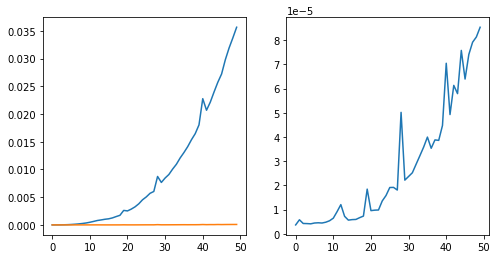

In [198]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].plot(times)
ax[1].plot(times[:,1])

plt.show()

In [199]:
np.save("time_data.npy", times)

### Excercise 2 | Matplotlib

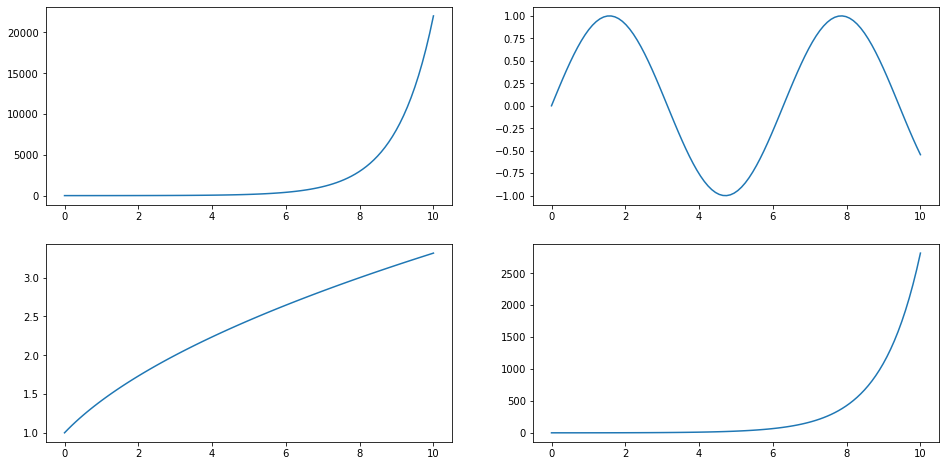

In [201]:
x = np.linspace(0, 10, 100)
y1 = np.exp(x)
y2 = np.sin(x)
y3 = np.sqrt(1+x)
y4 = np.i0(x)

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
axs[0][0].plot(x, y1)
axs[0][1].plot(x, y2)
axs[1][0].plot(x, y3)
axs[1][1].plot(x, y4)
plt.show()



**2 LAB** 

In [ ]:
## will be soon

**3 Nike**

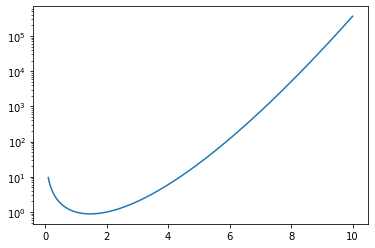

In [211]:
x = np.linspace(0.1, 10, 1000)
y = sc.special.gamma(x)

fig, ax = plt.subplots()
ax.plot(x, y)
# Nike
ax.set_yscale('log')


### Excercise 3 | Wiegner

In [212]:
N = 400
M = np.random.normal(size=(N, N));

In [232]:
bins = np.linspace(-60, 60, 50+1)
bin_centers = 0.5*(bins[1:] + bins[:-1])
all_eigs = 0

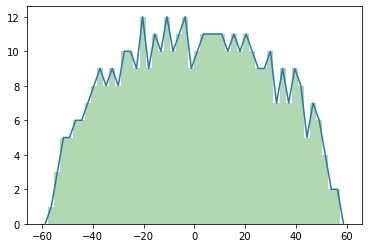

In [244]:
M = np.random.normal(size=(N, N));
M = np.transpose(M) + M
eigvals = np.linalg.eigvals(M)

y, _ = np.histogram(eigs, bins=bins)

# сохраняем полученные значения
all_eigs = [y];

plt.hist(eigs, bins=bins, color="green", alpha=0.3)
plt.plot(bin_centers, y)
plt.show()

In [246]:
all_eigs.shape

(51, 50)

In [253]:
# собираем данные
Num = 100
for i in range(Num):
    M = np.random.normal(size=(N, N));
    M = np.transpose(M) + M
    eigs = np.linalg.eigvals(M)
    y, _ = np.histogram(eigs, bins=bins)
    all_eigs = np.vstack((all_eigs,[y]))
    
    clear_output(wait=True)
    print(i+1, "/", Num)

100 / 50


In [247]:
all_eigs
# bin_centers.shape, y.shape

array([[0, 1, 3, ..., 2, 2, 0],
       [0, 1, 5, ..., 2, 2, 0],
       [0, 1, 2, ..., 3, 1, 1],
       ...,
       [0, 1, 2, ..., 3, 1, 0],
       [0, 0, 3, ..., 4, 2, 0],
       [0, 1, 4, ..., 2, 2, 0]])

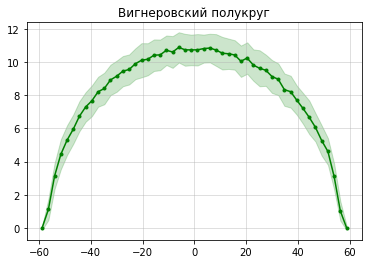

In [254]:
y = np.mean(all_eigs, 0)

yerr = np.std(all_eigs, 0)

# plt.errorbar(bin_centers, y, yerr = yerr, marker = '.',
#     color="green")

plt.plot(bin_centers, y, marker = '.',
    color="green")
plt.fill_between(bin_centers, y-yerr, y+yerr,color="green", alpha=0.2)


plt.title("Вигнеровский полукруг")
plt.grid(alpha=0.5)
plt.show()

**2** Гистограмма

In [32]:
N = 2000
M = np.random.normal(size=(N, N));
M = np.transpose(M) + M
eigs, _ = np.linalg.eig(M)

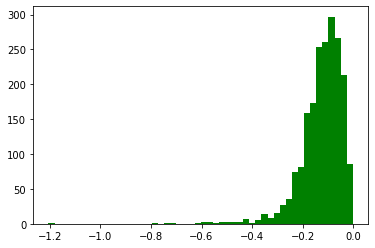

In [33]:
sort_eigs = np.sort(eigs)
y1 = sort_eigs[1:]
y2 = sort_eigs[:-1]
y = y2-y1
plt.hist(y, bins=50, color="g")
plt.show()

In [ ]:
bins = 

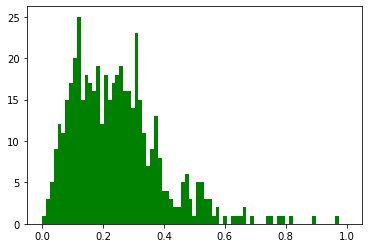

In [272]:
bins = np.linspace(0, 1, 80)
bin_centers = 0.5*(bins[1:] + bins[:-1])

N = 500
M = np.random.normal(size=(N, N));
M = np.transpose(M) + M
eigvals = np.linalg.eigvals(M)

eigvals = np.sort(eigvals)
y1 = eigvals[1:]
y2 = eigvals[:-1]
dist_eig = y1-y2

y, _ = np.histogram(dist_eig, bins=bins)
all_dist = [y]

plt.hist(dist_eig, bins=bins, color="g")
plt.show()


# plt.hist(eigs, bins=bins, color="green", alpha=0.3)
# plt.plot(bin_centers, y)
# plt.show()

In [273]:
# собираем данные
Num = 100
for i in range(Num):
    M = np.random.normal(size=(N, N));
    M = np.transpose(M) + M
    eigs = np.linalg.eigvals(M)
    
    eigvals = np.sort(eigvals)
    y1 = eigvals[1:]
    y2 = eigvals[:-1]
    dist_eig = y1-y2
    y, _ = np.histogram(dist_eig, bins=bins)
    
    all_dist = np.vstack((all_dist,[y]))
    
    clear_output(wait=True)
    print(i+1, "/", Num)

100 / 100


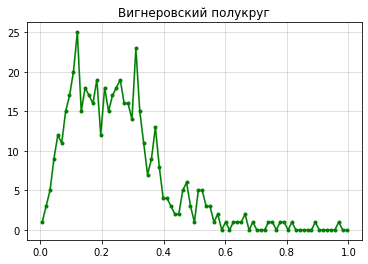

In [274]:
y = np.mean(all_dist, 0)

yerr = np.std(all_dist, 0)

# plt.errorbar(bin_centers, y, yerr = yerr, marker = '.',
#     color="green")

plt.plot(bin_centers, y, marker = '.',
    color="green")
plt.fill_between(bin_centers, y-yerr, y+yerr,color="green", alpha=0.2)


plt.title("Вигнеровский полукруг")
plt.grid(alpha=0.5)
plt.show()